In [103]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# ***Linear Regression***

In [104]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [105]:
input = pd.DataFrame(iris['data'],columns = iris['feature_names'])
input.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [106]:
target =  pd.DataFrame(iris['target'],columns = ['Target'])
target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [107]:
os.makedirs('linear_regression_models',exist_ok = True)
os.makedirs('linear_regression_plots',exist_ok = True)
os.makedirs('logistic_regression_models',exist_ok = True)
os.makedirs('logistic_regression_plots',exist_ok = True)

# Importing The necessay liberaries

In [108]:
# Model preparation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [109]:
def model_preparation():
  model = Sequential()
  model.add(Dense(4,input_dim = 1,activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(1))
  opt = SGD(learning_rate = 0.033 ,momentum = 0.4)
  model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
  return model

In [110]:
def plotting(history):
  
  plt.plot(history.history['loss'], color='blue')


# Creating,Training and Storing The Models Along with their graph

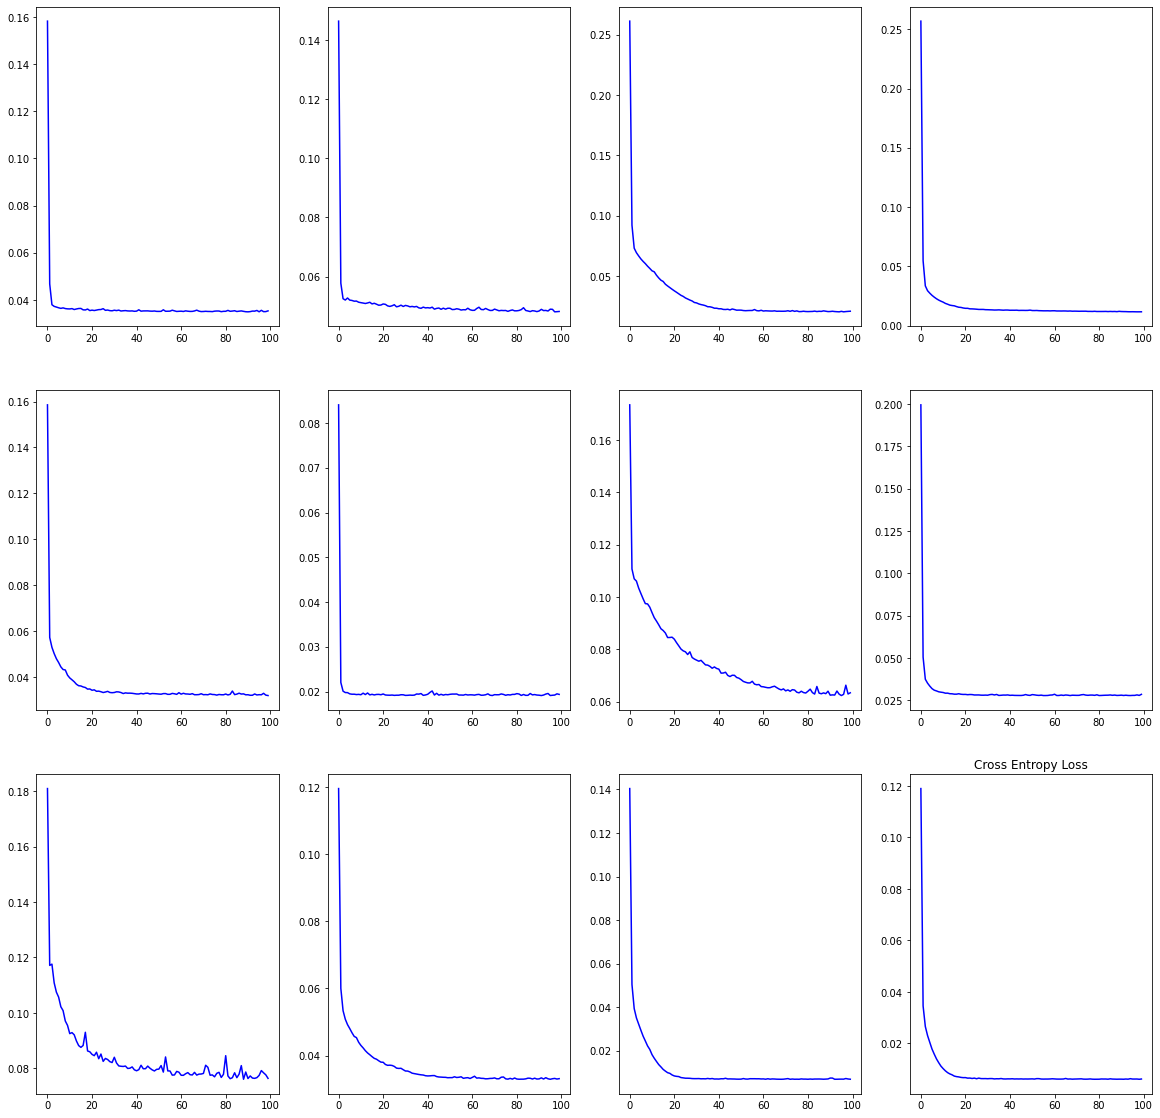

In [111]:
datas = []
models = []
count = 1
input_data = []
fig = plt.figure(figsize = (20, 20))
scalar = MinMaxScaler()
dct = {}
for i in range(len(input.columns.to_list())):
  for j in range(i+1,len(input.columns.to_list())):

    model = model_preparation()
    temp = train_test_split(input[[input.columns.to_list()[i]]],input[[input.columns.to_list()[j]]],train_size = 0.9) 
    
    
    x_train,y_train = temp[0],temp[2]
    input_data.append((temp[0],temp[2]))
    x_train= scalar.fit_transform(x_train)
    y_train= scalar.fit_transform(y_train)
    datas.append((temp[1],temp[3]))
    history = model.fit(x_train,y_train,epochs = 100,batch_size = 32,verbose=  0)
    dct[count] = input.columns.to_list()[i] + ' vs ' + input.columns.to_list()[j] + '  ' + f'model{count}'
    plt.subplot(3,4,count)
    plotting(history)
    
    
    model.save(f'linear_regression_models/model{count}.h5')
    
    
    
    count +=1
   
    
    model = model_preparation()
    temp = train_test_split(input[[input.columns.to_list()[j]]],input[[input.columns.to_list()[i]]],train_size = 0.9) 

    x_train,y_train = temp[0],temp[2]
    input_data.append((temp[0],temp[2]))
    x_train= scalar.fit_transform(x_train)
    y_train= scalar.fit_transform(y_train)
    datas.append((temp[1],temp[3]))
    history = model.fit(x_train,y_train,epochs = 100,batch_size = 32,verbose = 0)
    dct[count] = input.columns.to_list()[j] + ' vs ' + input.columns.to_list()[i] + " " + f'model {count}'
    plt.subplot(3,4,count)
    plotting(history)
   
    
    model.save(f'linear_regression_models/model{count}.h5')
    
    count +=1

    
plt.savefig(f'linear_regression_plots/plots.jpg')
plt.title('Cross Entropy Loss')
plt.show()

In [112]:
# regrularized model 
from keras.regularizers import l2

In [113]:
def regularized_model():
  model = Sequential()
  model.add(Dense(4,input_dim = 1,kernel_regularizer = l2(0.01), activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(1))
  opt = SGD(learning_rate = 0.033 ,momentum = 0.4)
  model.compile(optimizer=opt, loss='mse')
  return model

# Comparing Non- regularized and regularized model

In [114]:
reg_model = regularized_model()
model = model_preparation()

In [115]:
num = np.random.randint(1,7)
x_train,y_train = input_data[num-1]
scalar = MinMaxScaler()

In [116]:
x_train= scalar.fit_transform(x_train)
y_train= scalar.fit_transform(y_train)
print(x_train.max(),x_train.min())
print(y_train.max(),y_train.min())

1.0 0.0
1.0 0.0


In [117]:
history1 = model.fit(x_train,y_train,epochs = 100 ,batch_size = 32,verbose = 0)
history = reg_model.fit(x_train,y_train,epochs = 100, batch_size = 32,verbose = 0)

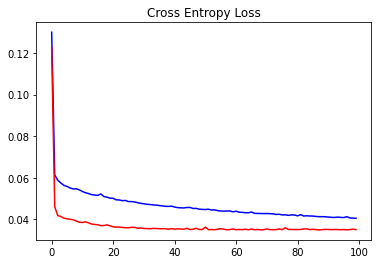

In [118]:

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color = 'blue',label = 'regularized')

plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'],color = 'red',label = 'non-regularized')

plt.savefig('linear_regression_plots/Regularized_and_non_regurlarized.jpg')
plt.show()


# Non - Regularized Model

In [119]:
model.get_weights()

[array([[0.72158515, 1.0704936 , 0.04415752, 0.24302578]], dtype=float32),
 array([ 0.0163712 ,  0.04101502,  0.03406696, -0.00729295], dtype=float32),
 array([[-0.25082067, -0.2836604 , -0.09695828,  0.23078641,  0.25725722,
          0.27830598, -0.4237177 ,  0.32769632,  0.30118248, -0.20559013,
          0.05083326,  0.3484334 , -0.3329382 , -0.33143058, -0.22023332,
         -0.2676007 , -0.09788236, -0.40615612,  0.02995661, -0.19400911,
         -0.04857433,  0.28171486, -0.39013085, -0.09353953,  0.37537834,
          0.15005259,  0.15573668, -0.36109427, -0.21542035, -0.14252543,
         -0.28777483, -0.22175445],
        [-0.1762801 , -0.37843627, -0.15101784,  0.06743358, -0.13506997,
         -0.2711182 ,  0.3579391 ,  0.2953684 , -0.3163018 , -0.18326633,
         -0.2736399 ,  0.06853985,  0.02927038, -0.3844233 , -0.24498884,
          0.10560779, -0.32516617, -0.21572997, -0.01327141, -0.13778064,
         -0.33745897, -0.07989743, -0.16985257,  0.23269147,  0.25849426

In [120]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 4)                 8         
                                                                 
 dense_301 (Dense)           (None, 32)                160       
                                                                 
 dense_302 (Dense)           (None, 1)                 33        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


# Regularized Model

In [121]:
reg_model.get_weights()

[array([[ 0.13836598,  0.5604824 , -0.20569187, -0.4102124 ]],
       dtype=float32),
 array([0.0220891 , 0.07055557, 0.        , 0.        ], dtype=float32),
 array([[-0.03762161,  0.11889446, -0.2421318 , -0.36899653,  0.1087619 ,
          0.21222383,  0.19489431, -0.23843464, -0.2793852 ,  0.18540801,
          0.1014879 , -0.24766634, -0.27022475,  0.26168957, -0.15661512,
         -0.20388073,  0.0265081 ,  0.02053922, -0.00079492,  0.3906871 ,
          0.11900172, -0.02155471,  0.0066815 , -0.35158733, -0.07260359,
          0.1327101 ,  0.15063328,  0.2876742 , -0.19514066,  0.08614218,
         -0.3550028 , -0.28542098],
        [ 0.30563194, -0.1908223 , -0.40543127,  0.15434663, -0.01284148,
          0.19635202,  0.22082342,  0.19736736, -0.03101683,  0.0490207 ,
          0.32569298,  0.26096526, -0.04820222, -0.01208659,  0.15872686,
         -0.39516866,  0.12487838, -0.32075498, -0.28394172,  0.273423  ,
         -0.02057111, -0.03772548, -0.31727606,  0.3550839 ,  0.4

In [122]:
reg_model.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_297 (Dense)           (None, 4)                 8         
                                                                 
 dense_298 (Dense)           (None, 32)                160       
                                                                 
 dense_299 (Dense)           (None, 1)                 33        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


# Testing models

In [123]:
num = 1
prediction = {}
minimum = 1000
indexx = 1000

for model_path in os.listdir('linear_regression_models'):
    model_path = os.path.join('linear_regression_models',model_path)
    
    x_test,y_test = datas[num -1]
    
    model = load_model(model_path)
    temp = model.predict(x_test)

    prediction[f'model{num}'] = mean_squared_error(temp, y_test)
    if prediction[f'model{num}'] < minimum:
        minimum = prediction[f'model{num}'] 
        indexx = num
    num +=1
    


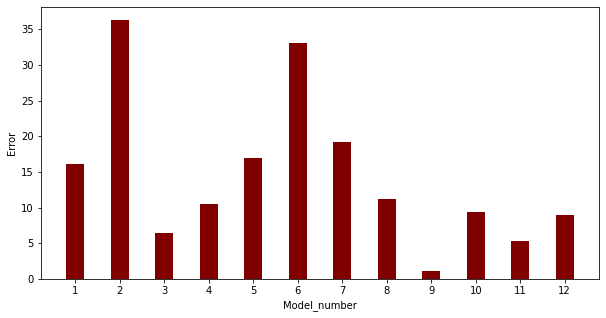

In [124]:
model_num = list(range(1,13))
fig = plt.figure(figsize = (10, 5))
plt.bar(model_num ,list(prediction.values()), color ='maroon',width = 0.4)
default_x_ticks = range(1,len(model_num)+1)
plt.ylabel('Error')
plt.xlabel('Model_number')
plt.xticks(default_x_ticks , model_num)
plt.savefig('linear_regression_plots/Errors_in_each_model.jpg')
plt.show()

# With the help of the Above graph we can see the model with least errors out of the others

In [125]:
# Input and output of model number with least errors
dct[indexx]

'sepal width (cm) vs petal width (cm)  model9'

# ***Logistic regression***

In [126]:
def regularized_model(lr):
  
  model = Sequential()
  model.add(Dense(4,input_dim = 2,kernel_regularizer = l2(0.01), activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(1))
  opt = SGD(learning_rate = lr ,momentum = 0.4)
  model.compile(optimizer=opt, loss='mse')
  return model

In [127]:
def plotting(history,lr):
  
  plt.plot(history.history['loss'])


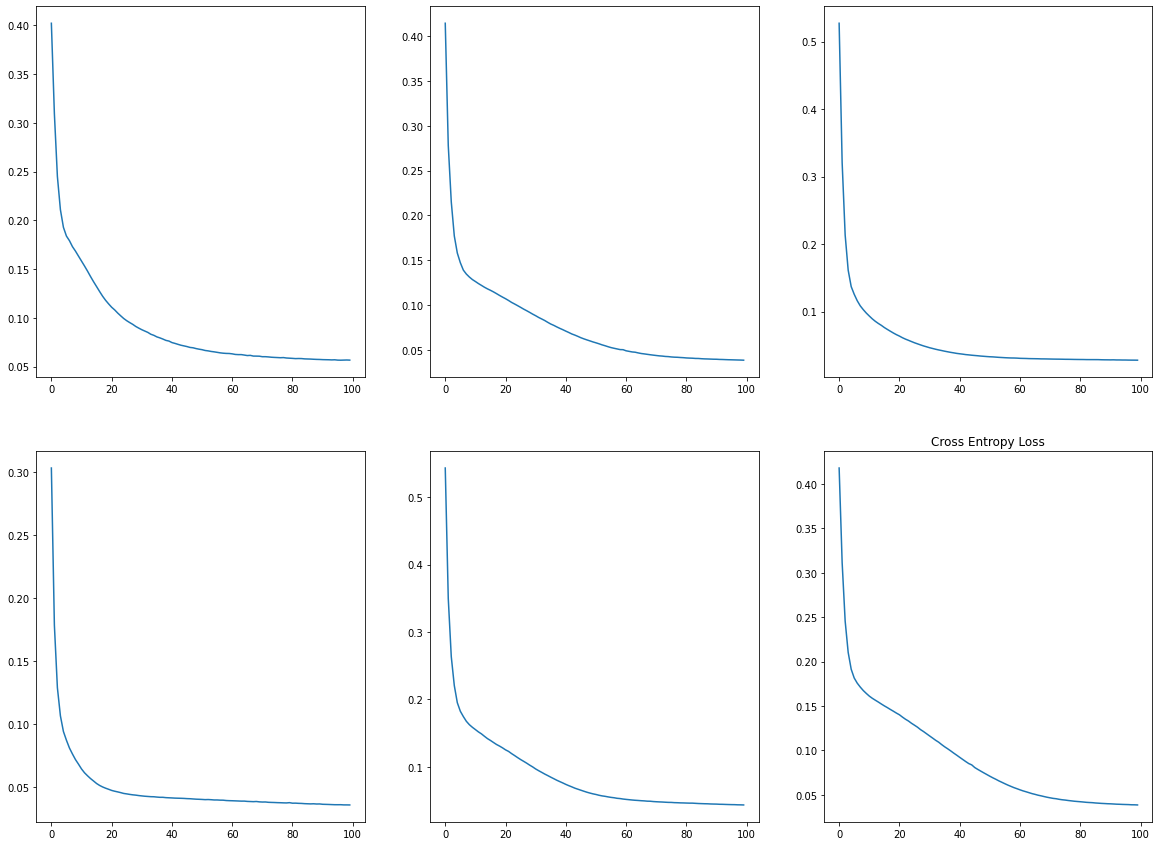

In [128]:

datas = []
count = 1
lr = 0.01
input_data = []
fig = plt.figure(figsize = (20, 15))
for i in range(len(input.columns.to_list()) -1):
  for j in range(i+1,len(input.columns.to_list())):

    model = regularized_model(lr)
    temp = train_test_split(input[[input.columns.to_list()[i],input.columns.to_list()[j]]],target,train_size = 0.9) 
    plt.subplot(2,3,count)
    scalar = MinMaxScaler()
    x_train,y_train = temp[0],temp[2]
    input_data.append((temp[0],temp[2]))
    x_train= scalar.fit_transform(x_train)
    y_train= scalar.fit_transform(y_train)
    datas.append((temp[1],temp[3]))
    history = model.fit(x_train,y_train,epochs = 100,batch_size = 32,verbose=  0)
    plotting(history,lr)
    dct[count] = input.columns.to_list()[i] + ' & ' + input.columns.to_list()[j] + ' ' + f'model{count}'
    model.save(f'logistic_regression_models/model{count}.h5')
    count +=1

      
plt.title('Cross Entropy Loss')   
plt.savefig(f'logistic_regression_plots/plots.jpg')
plt.show()



In [129]:
def regularized_model(lr):
  model = Sequential()
  model.add(Dense(4,input_dim = 2,kernel_regularizer = l2(0.01), activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(1))
  opt = SGD(learning_rate = lr,momentum = 0.4)
  model.compile(optimizer=opt, loss='mse')
  return model

In [130]:
num = np.random.randint(1,7)
x_train,y_train = input_data[num-1]
scalar = MinMaxScaler()

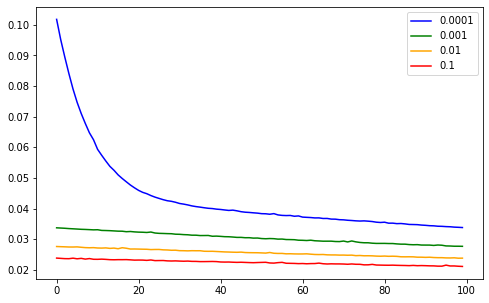

In [131]:
fig = plt.figure(figsize = (8, 5))
lrs = [0.0001,0.001,0.01,0.1]
dct1 ={0.0001:'blue',0.001:'green',0.01:'orange',0.1:'red'}
for lr in lrs:
    new_model = regularized_model(lr)
    x_train = scalar.fit_transform(x_train)
    y_train = scalar.fit_transform(y_train)
    history = model.fit(x_train,y_train,epochs= 100 ,batch_size= 32,verbose = 0)
    plt.plot(history.history['loss'], color = dct1[lr])


plt.legend(list(dct1.keys()))
plt.savefig('logistic_regression_plots/loss_of_model.jpg')
plt.show()

# Testing Models

In [132]:
num = 1
prediction = { }
minimum = 100
indexx = 100
for model_path in os.listdir('logistic_regression_models'):
    model_path = os.path.join('logistic_regression_models',model_path)
    
    x_test,y_test = datas[num -1]
    
    model = load_model(model_path)
    temp = model.predict(x_test)

    prediction[f'model{num}'] = mean_squared_error(temp, y_test)
    if prediction[f'model{num}'] < minimum:
        minimum = prediction[f'model{num}'] 
        indexx = num
    num +=1

# Performace of each model

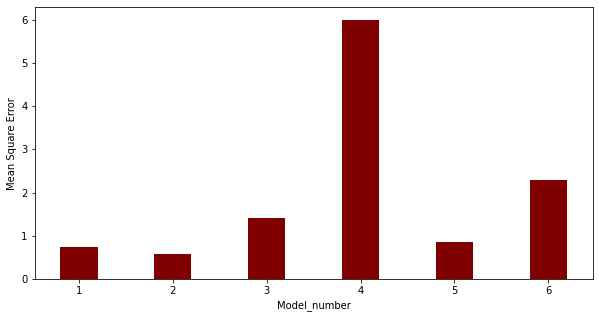

In [133]:
model_num = list(range(1,7))
fig = plt.figure(figsize = (10, 5))
plt.bar(model_num ,list(prediction.values()), color ='maroon',width = 0.4)
default_x_ticks = range(1,len(model_num)+1)
plt.ylabel('Mean Square Error')
plt.xlabel('Model_number')
plt.xticks(default_x_ticks , model_num)
plt.savefig('logistic_regression_plots/Errors_in_each_model.jpg')
plt.show()

# Model With Best Performance

In [134]:
# Input and output of the model with least error
dct[indexx]

'sepal length (cm) & petal length (cm) model2'